# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [100]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/"
fileName = "100zloty.jpg"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, "wb").write(r.content)

In [101]:
def draw(image):
    plt.imshow(image)
    plt.gray()
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

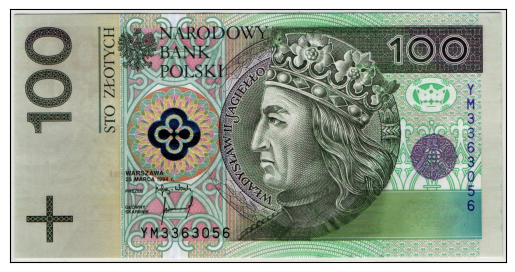

In [102]:
banknot = cv2.imread(fileName)
draw(banknot)

In [103]:
import numpy as np

bit_decomposition = []

banknot_decompose = banknot.copy()
for i in range(8):
    bit_image = cv2.bitwise_and(banknot_decompose, np.array([1, 1, 1]))
    bit_decomposition.append(bit_image)
    banknot_decompose = banknot_decompose >> 1

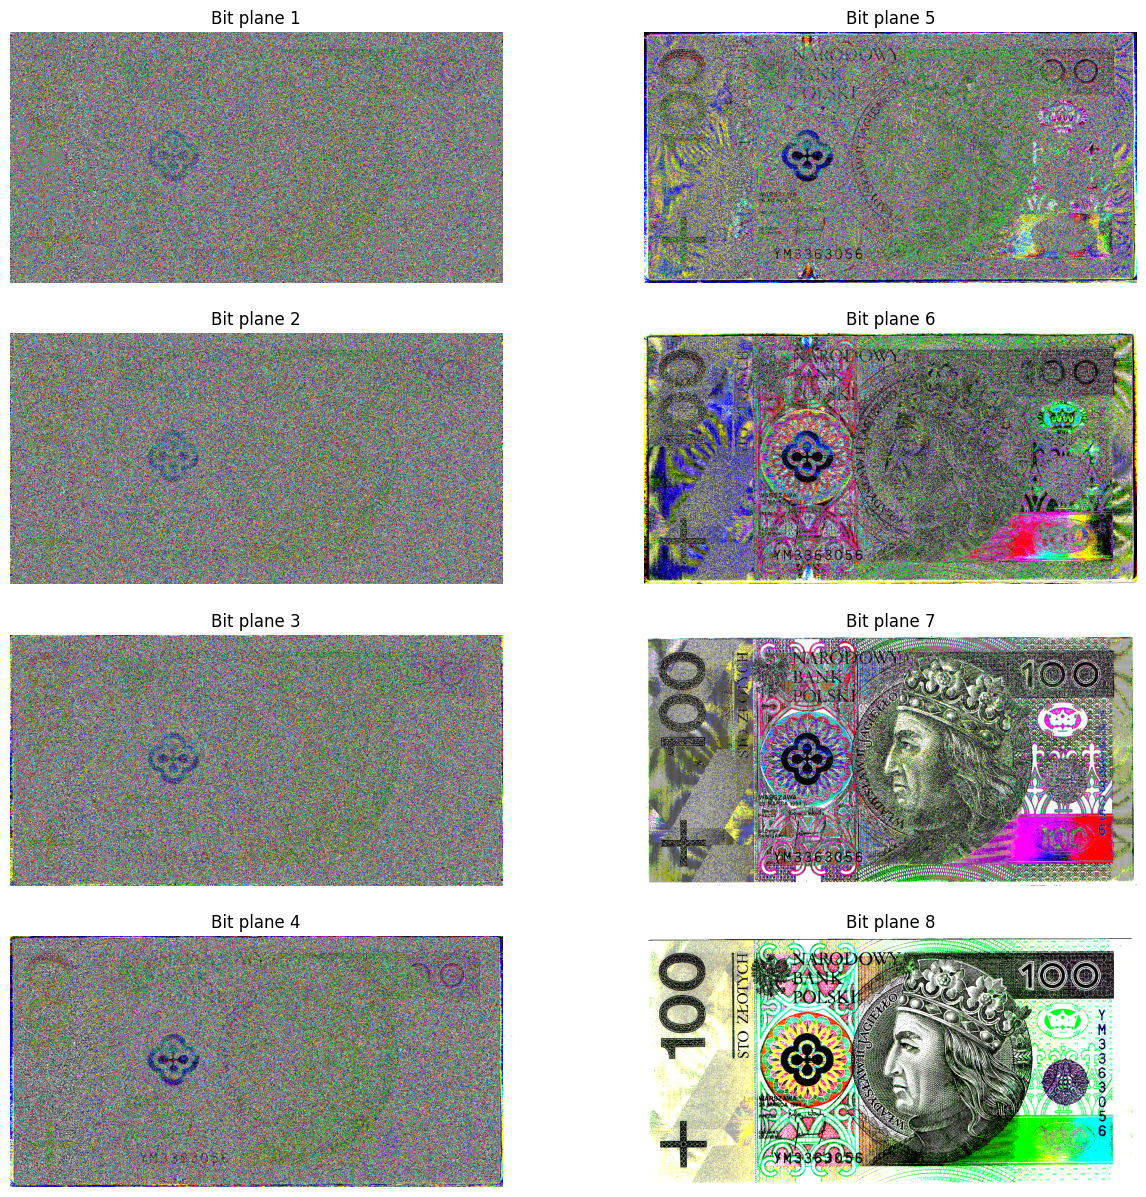

In [104]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i in range(8):
    axs[i % 4, i // 4].imshow(bit_decomposition[i].astype(np.float64))
    axs[i % 4, i // 4].axis("off")
    axs[i % 4, i // 4].set_title(f"Bit plane {i + 1}")

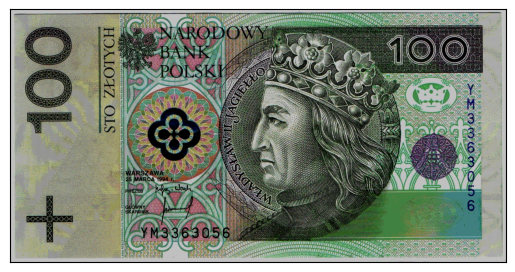

In [105]:
reconstruction_1 = cv2.add(bit_decomposition[7] * 2**7, bit_decomposition[6] * 2**6)
draw(reconstruction_1)

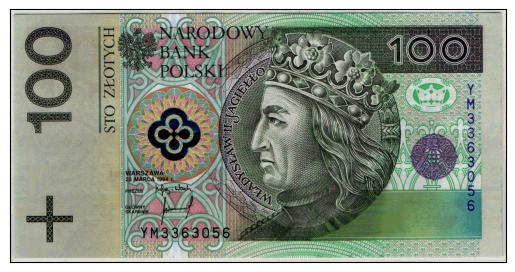

In [106]:
reconstruction_2 = (
    bit_decomposition[7] * 2**7
    + bit_decomposition[6] * 2**6
    + bit_decomposition[5] * 2**5
)
draw(reconstruction_2)

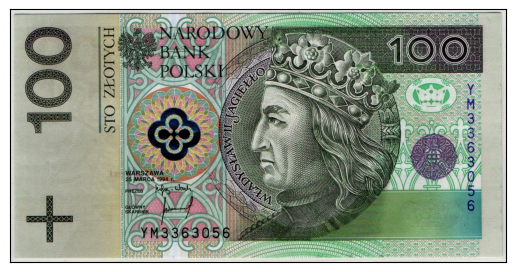

In [107]:
reconstruction_3 = (
    bit_decomposition[7] * 2**7
    + bit_decomposition[6] * 2**6
    + bit_decomposition[5] * 2**5
    + bit_decomposition[4] * 2**4
)
draw(reconstruction_3)

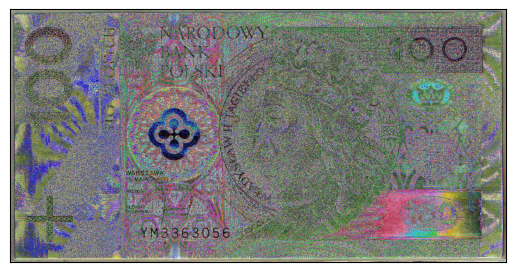

In [108]:
reconstruction_4 = (
    bit_decomposition[0]
    + bit_decomposition[1] * 2
    + bit_decomposition[2] * 2**2
    + bit_decomposition[3] * 2**3
    + bit_decomposition[4] * 2**4
    + bit_decomposition[5] * 2**5
)

min = np.min(reconstruction_4)
max = np.max(reconstruction_4)

reconstruction_4 = (reconstruction_4 - min) / (max - min)
draw(reconstruction_4)